In [ ]:
%load_ext autoreload
%autoreload 2

# Main code

In [1]:
import networkx as nx
import pandas as pd
from Qommunity.searchers.community_searcher import CommunitySearcher
from Qommunity.searchers.hierarchical_community_searcher import HierarchicalCommunitySearcher

def run(searcher: CommunitySearcher | HierarchicalCommunitySearcher,
        n: int, sampler_name: str, graph_name: str):

    df = pd.DataFrame(columns=["sampler_name", "graph_name", "vertices_no",
                               "edges_no", "modularity"])

    for i in range(n):
        try:
            if isinstance(searcher, CommunitySearcher):
                result = searcher.community_search(1)
            else:
                result = searcher.hierarchical_community_search(1)
            modularity = nx.community.modularity(searcher.sampler.G,
                                                result)

            data = {
                "sampler_name": sampler_name,
                "graph_name": graph_name,
                "vertices_no": searcher.sampler.G.number_of_nodes(),
                "edges_no": searcher.sampler.G.number_of_edges(),
                "modularity": modularity
            }
            print(f"{i} iteration finished for {sampler_name}, {searcher.sampler.G.number_of_nodes()}")
            df.loc[len(df)] = data
        except:
            print(f"{i} iteration failed for {sampler_name}, {searcher.sampler.G.number_of_nodes()}")

    return df


### Simple example

In [2]:
from Qommunity.samplers.regular.louvain_sampler import LouvainSampler
from Qommunity.samplers.regular.leiden_sampler import LeidenSampler
from Qommunity.samplers.hierarchical.advantage_sampler import AdvantageSampler


G = nx.karate_club_graph()
sampler = LouvainSampler(G)
searcher = CommunitySearcher(sampler)

In [3]:
df = run(searcher, 100, "louvain", "karate")

In [4]:
df

,sampler_name,graph_name,vertices_no,edges_no,modularity
0,louvain,karate,34,78,0.443854
1,louvain,karate,34,78,0.443854
2,louvain,karate,34,78,0.443854
3,louvain,karate,34,78,0.434521
4,louvain,karate,34,78,0.427672
...,...,...,...,...,...
95,louvain,karate,34,78,0.443854
96,louvain,karate,34,78,0.443854
97,louvain,karate,34,78,0.444904
98,louvain,karate,34,78,0.417552


In [3]:
G = nx.erdos_renyi_graph(10, 0.2)
a_sampler = AdvantageSampler(G)
a_searcher = HierarchicalCommunitySearcher(a_sampler)
a_df = run(a_searcher, 5, "advantage", "random")
a_df

Starting community detection
Stopping community detection
Result: 
[[1, 3, 4, 6], [0, 7], [2, 5, 8, 9]]
0 iteration finished for advantage, 10
Starting community detection
Stopping community detection
Result: 
[[2, 5, 8, 9], [0, 7], [1, 3, 4, 6]]
1 iteration finished for advantage, 10
Starting community detection
Stopping community detection
Result: 
[[1, 3, 4, 6], [2, 5, 8, 9], [0, 7]]
2 iteration finished for advantage, 10
Starting community detection
Stopping community detection
Result: 
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
3 iteration finished for advantage, 10
Starting community detection
Stopping community detection
Result: 
[[0, 7], [1, 3, 4, 6], [2, 5, 8, 9]]
4 iteration finished for advantage, 10


,sampler_name,graph_name,vertices_no,edges_no,modularity
0,advantage,random,10,13,0.298817
1,advantage,random,10,13,0.298817
2,advantage,random,10,13,0.298817
3,advantage,random,10,13,0.000000
4,advantage,random,10,13,0.298817


### Run experiments 

Main experiments loop, change as you wish

In [ ]:
final_df = pd.DataFrame()
for n in range(10, 101, 10):
    G = nx.erdos_renyi_graph(n, 0.2)

    lo_sampler = LouvainSampler(G)
    le_sampler = LeidenSampler(G)
    a_sampler = AdvantageSampler(G)

    lo_searcher = CommunitySearcher(lo_sampler)
    le_searcher = CommunitySearcher(le_sampler)
    a_searcher = HierarchicalCommunitySearcher(a_sampler)

    lo_df = run(lo_searcher, 20, "louvain", "random")
    le_df = run(le_searcher, 20, "leiden", "random")
    a_df = run(a_searcher, 5, "advantage", "random")
    final_df = pd.concat([final_df, a_df], ignore_index=True)


In [6]:
final_df.to_csv("results.csv", encoding='utf-8')

### Visualization

Put your data and execute

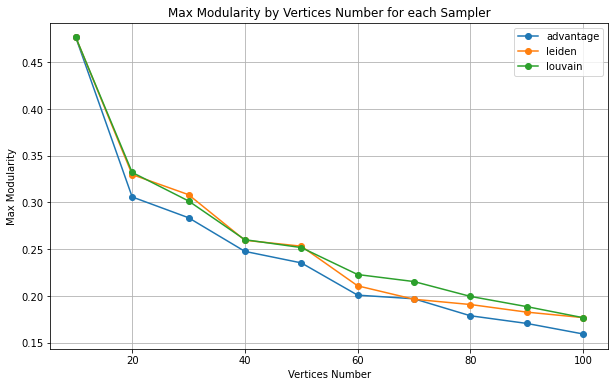

In [25]:
import matplotlib.pyplot as plt

grouped_df = final_df.groupby(['sampler_name', 'vertices_no']).max().reset_index()

plt.figure(figsize=(10, 6))
for sampler in grouped_df['sampler_name'].unique():
    sampler_data = grouped_df[grouped_df['sampler_name'] == sampler]
    plt.plot(sampler_data['vertices_no'], sampler_data['modularity'], marker='o', label=sampler)

plt.xlabel('Vertices Number')
plt.ylabel('Max Modularity')
plt.title('Max Modularity by Vertices Number for each Sampler')
plt.legend()
plt.grid(True)
plt.show()

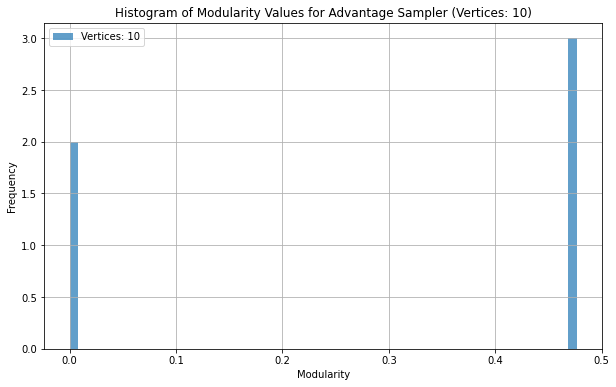

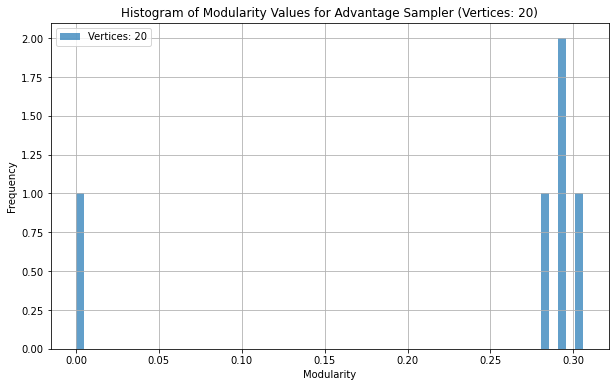

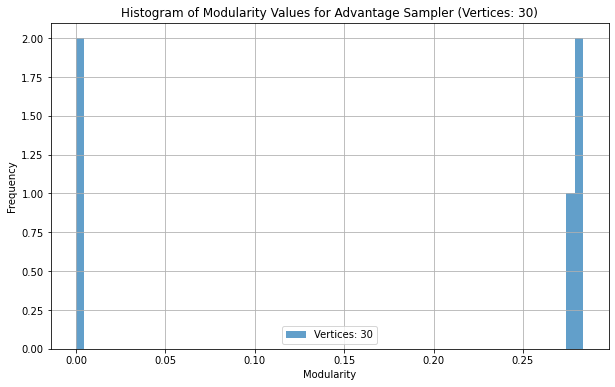

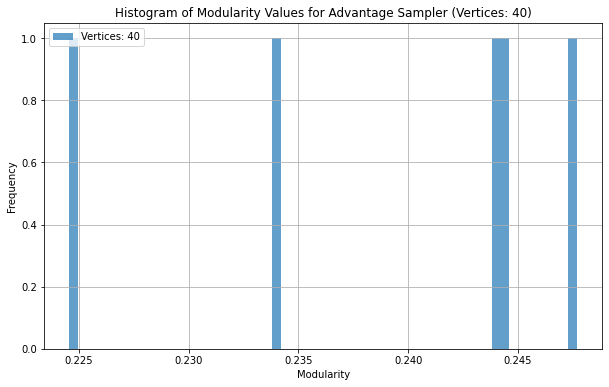

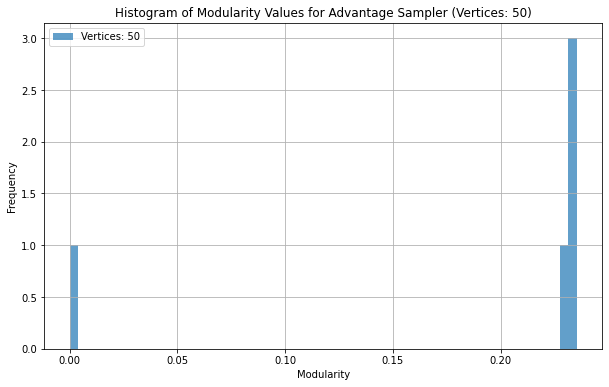

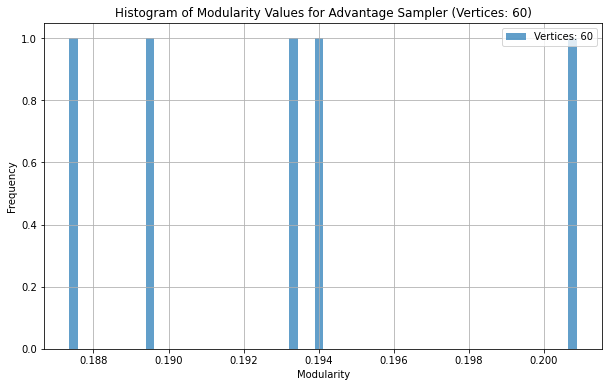

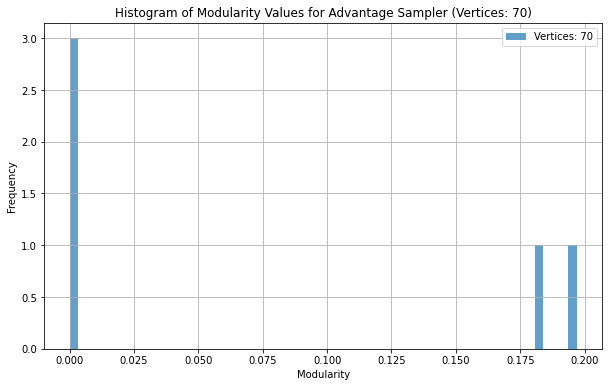

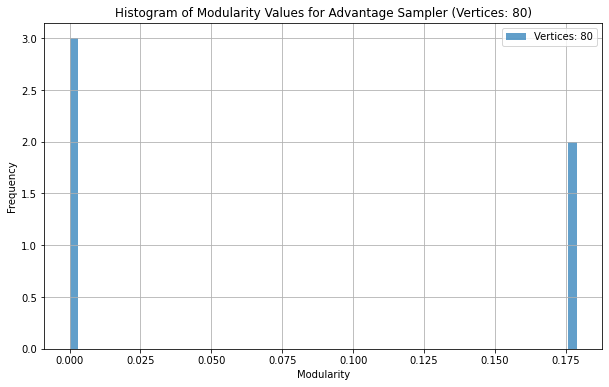

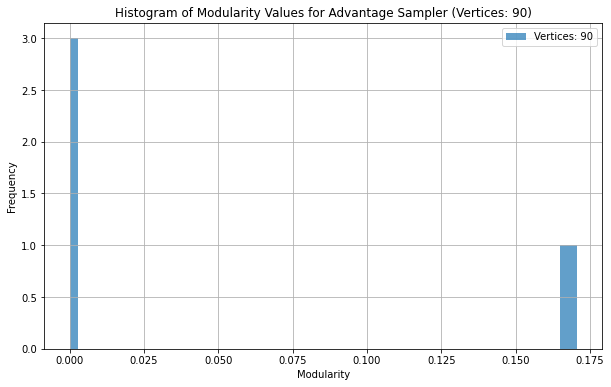

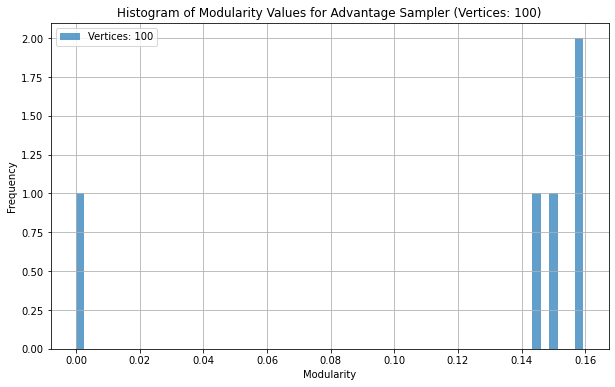

In [29]:
df_advantage = df[df'sampler_name'] == 'advantage']
vertices_numbers = df_advantage['vertices_no'].unique()

for vertices_no in vertices_numbers:
    plt.figure(figsize=(10, 6))
    subset = df_advantage[df_advantage['vertices_no'] == vertices_no]
    plt.hist(subset['modularity'], bins=60, alpha=0.7, label=f'Vertices: {vertices_no}')
    plt.xlabel('Modularity')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Modularity Values for Advantage Sampler (Vertices: {vertices_no})')
    plt.legend()
    plt.grid(True)
    plt.show()